In [1]:
import pandas as pd

In [3]:
data=pd.read_excel(r"E:\Pandas(Python)\ML\ML Live Flight Fare Resourses16963295320.xlsx")

In [4]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
data[data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
data[(data["Source"]=="Delhi")&(data["Destination"]=="Cochin")]["Total_Stops"].value_counts()

Total_Stops
1 stop      3185
2 stops     1113
non-stop     213
3 stops       25
Name: count, dtype: int64

In [8]:
data.fillna("1 stop",inplace=True)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
data.drop(columns=["Route","Additional_Info"],inplace=True)

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10683 non-null  object
 8   Price            10683 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 751.3+ KB


In [16]:
data["j_date"]=pd.to_datetime(data["Date_of_Journey"]).dt.day
data["j_mon"]=pd.to_datetime(data["Date_of_Journey"]).dt.month

In [19]:
data["d_hr"]=pd.to_datetime(data["Dep_Time"]).dt.hour
data["d_min"]=pd.to_datetime(data["Dep_Time"]).dt.minute
data["a_hr"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["a_min"]=pd.to_datetime(data["Arrival_Time"]).dt.minute

In [20]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,j_date,j_mon,d_hr,d_min,a_hr,a_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4,8,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,11,30,14,10


In [21]:
lis=data["Duration"]

In [36]:
new_lis=[]
for i in lis:
    if len(i.split(" "))==1:

        if "m" in i:
            i="0h "+i
        else:
            i=i+" 0m"
            
    new_lis.append(i)

In [37]:
data["Duration"]=new_lis

In [38]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,j_date,j_mon,d_hr,d_min,a_hr,a_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h 0m,2 stops,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h 0m,non-stop,7229,27,4,8,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,11,30,14,10


In [40]:
data["dur_hr"]=data["Duration"].str.split().str[0].replace("h","",regex=True).astype(int)
data["dur_min"]=data["Duration"].str.split().str[1].replace("m","",regex=True).astype(int)

In [41]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,j_date,j_mon,d_hr,d_min,a_hr,a_min,dur_hr,dur_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h 0m,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,11,30,14,10,2,40


In [42]:
data.drop(columns=["Dep_Time","Arrival_Time","Duration","Date_of_Journey"],inplace=True)

In [43]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,d_hr,d_min,a_hr,a_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [44]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [46]:
data["Total_Stops"].replace("non-stop","0 STOP",inplace=True)
data["Total_Stops"].replace("[A-Za-z]","",regex=True,inplace=True)
data["Total_Stops"]=data["Total_Stops"].astype(int)

In [47]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,d_hr,d_min,a_hr,a_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


In [48]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [49]:
data[["Airline","Source","Destination"]]=data[["Airline","Source","Destination"]].apply(enc.fit_transform)

In [50]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,d_hr,d_min,a_hr,a_min,dur_hr,dur_min
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,19,55,22,25,2,30
10679,1,3,0,0,4145,27,4,20,45,23,20,2,35
10680,4,0,2,0,7229,27,4,8,20,11,20,3,0
10681,10,0,5,0,12648,1,3,11,30,14,10,2,40


In [51]:
x=data.drop("Price",axis=1)

In [52]:
y=data.Price

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=10)

In [108]:
model=LinearRegression()

In [109]:
model.fit(x_train,y_train)

LinearRegression()

In [110]:
model.score(x_train,y_train)

0.42170247965903274

In [111]:
model.score(x_test,y_test)

0.4293391610568835

In [112]:
from sklearn.model_selection import cross_val_score,KFold

In [113]:
K=KFold(n_splits=4)

In [114]:
cross_val_score(LinearRegression(),x,y,cv=K).mean()

0.4301782170159604

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [116]:
lis=[DecisionTreeRegressor,KNeighborsRegressor,SVR,RandomForestRegressor]

In [117]:
for i in lis:
    K=KFold(n_splits=4)
    print(i)
    print(cross_val_score(i(),x,y,cv=K).mean())

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
0.7080878178827008
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
0.6125781418768905
<class 'sklearn.svm._classes.SVR'>
0.010246558497976954
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.7981576803543069


In [118]:
model=RandomForestRegressor(n_estimators=1000,random_state=20)

In [119]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=20)

In [120]:
model.score(x_train,y_train)

0.9626174033295433

In [121]:
model.score(x_test,y_test)

0.7697417504920696

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
random=RandomizedSearchCV(RandomForestRegressor(),param_distributions={"n_estimators":[900,800,1000],"random_state":[10,20,30],"max_depth":[2,3,4]},n_iter=10,cv=K,verbose=2)

In [81]:
random.fit(x,y)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] END .....max_depth=4, n_estimators=800, random_state=30; total time=   3.9s
[CV] END .....max_depth=4, n_estimators=800, random_state=30; total time=   4.0s
[CV] END .....max_depth=4, n_estimators=800, random_state=30; total time=   3.9s
[CV] END .....max_depth=4, n_estimators=800, random_state=30; total time=   3.9s
[CV] END .....max_depth=3, n_estimators=800, random_state=20; total time=   3.2s
[CV] END .....max_depth=3, n_estimators=800, random_state=20; total time=   3.1s
[CV] END .....max_depth=3, n_estimators=800, random_state=20; total time=   3.1s
[CV] END .....max_depth=3, n_estimators=800, random_state=20; total time=   3.1s
[CV] END ....max_depth=4, n_estimators=1000, random_state=20; total time=   4.9s
[CV] END ....max_depth=4, n_estimators=1000, random_state=20; total time=   5.0s
[CV] END ....max_depth=4, n_estimators=1000, random_state=20; total time=   4.9s
[CV] END ....max_depth=4, n_estimators=1000, ran

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 3, 4],
                                        'n_estimators': [900, 800, 1000],
                                        'random_state': [10, 20, 30]},
                   verbose=2)

In [82]:
random.best_params_

{'random_state': 20, 'n_estimators': 1000, 'max_depth': 4}

<Axes: >

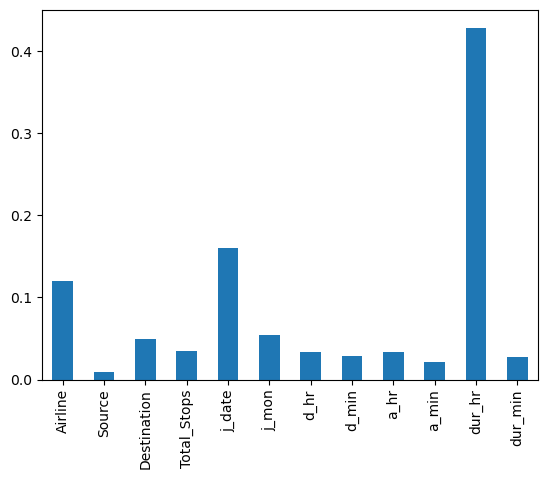

In [83]:
pd.Series(model.feature_importances_,index=x.columns).plot(kind="bar")

In [84]:
x.drop(["Source","dur_min"],axis=1,inplace=True)

In [85]:
x

,Airline,Destination,Total_Stops,j_date,j_mon,d_hr,d_min,a_hr,a_min,dur_hr
0,3,5,0,24,3,22,20,1,10,2
1,1,0,2,1,5,5,50,13,15,7
2,4,1,2,9,6,9,25,4,25,19
3,3,0,1,12,5,18,5,23,30,5
4,3,5,1,1,3,16,50,21,35,4
...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,9,4,19,55,22,25,2
10679,1,0,0,27,4,20,45,23,20,2
10680,4,2,0,27,4,8,20,11,20,3
10681,10,5,0,1,3,11,30,14,10,2


In [86]:
import joblib

In [88]:
cd Downloads/

C:\Users\OM\Downloads


In [124]:
joblib.dump(model,"ml_model.pkl")

['ml_model.pkl']

In [125]:
import joblib

In [126]:
mode=joblib.load("ml_model.pkl")

In [127]:
mode

RandomForestRegressor(n_estimators=1000, random_state=20)

In [130]:
mode.predict(x.loc[[2]])

array([13457.77166667])